In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm

In [2]:
# Loading Dataset

from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data[:,:] 
y=iris.target

In [4]:
df=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [5]:
df['Species']= iris['target']

In [6]:
df['Species']= df['Species'].apply(lambda x: iris['target_names'][x])

In [7]:
df.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Explaratory Data Analytics

In [10]:
# checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.columns

Index(['Petal length', 'Petal Width', 'Sepal Length', 'Sepal Width',
       'Species'],
      dtype='object')

In [12]:
# checking the missing values

df.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [10]:
# checking the duplicated values and dropping it 

df.duplicated().sum()
df = df.drop_duplicates()

In [11]:
# checking the statistical summary of the data

df.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualisation

<Figure size 1800x1800 with 0 Axes>

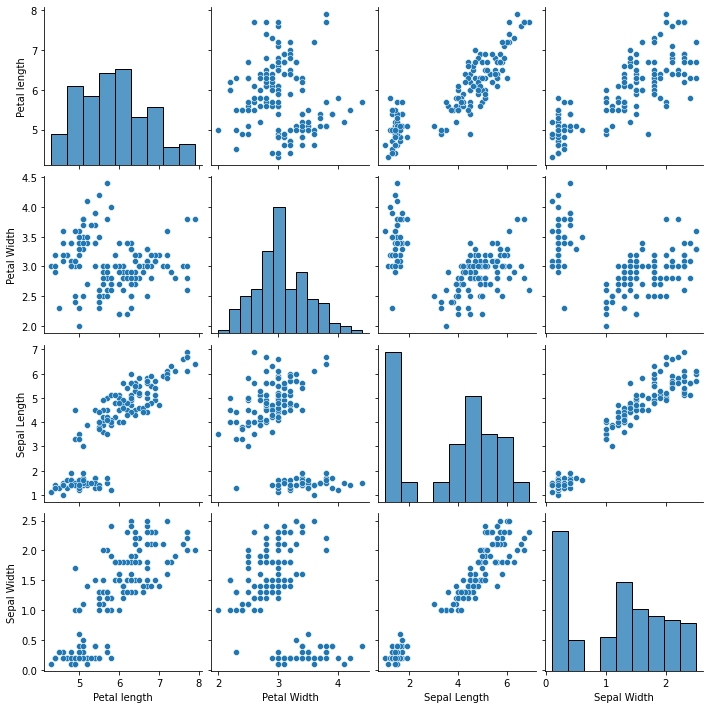

In [12]:
# Visualize iris dataset

plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

<Figure size 2500x2500 with 0 Axes>

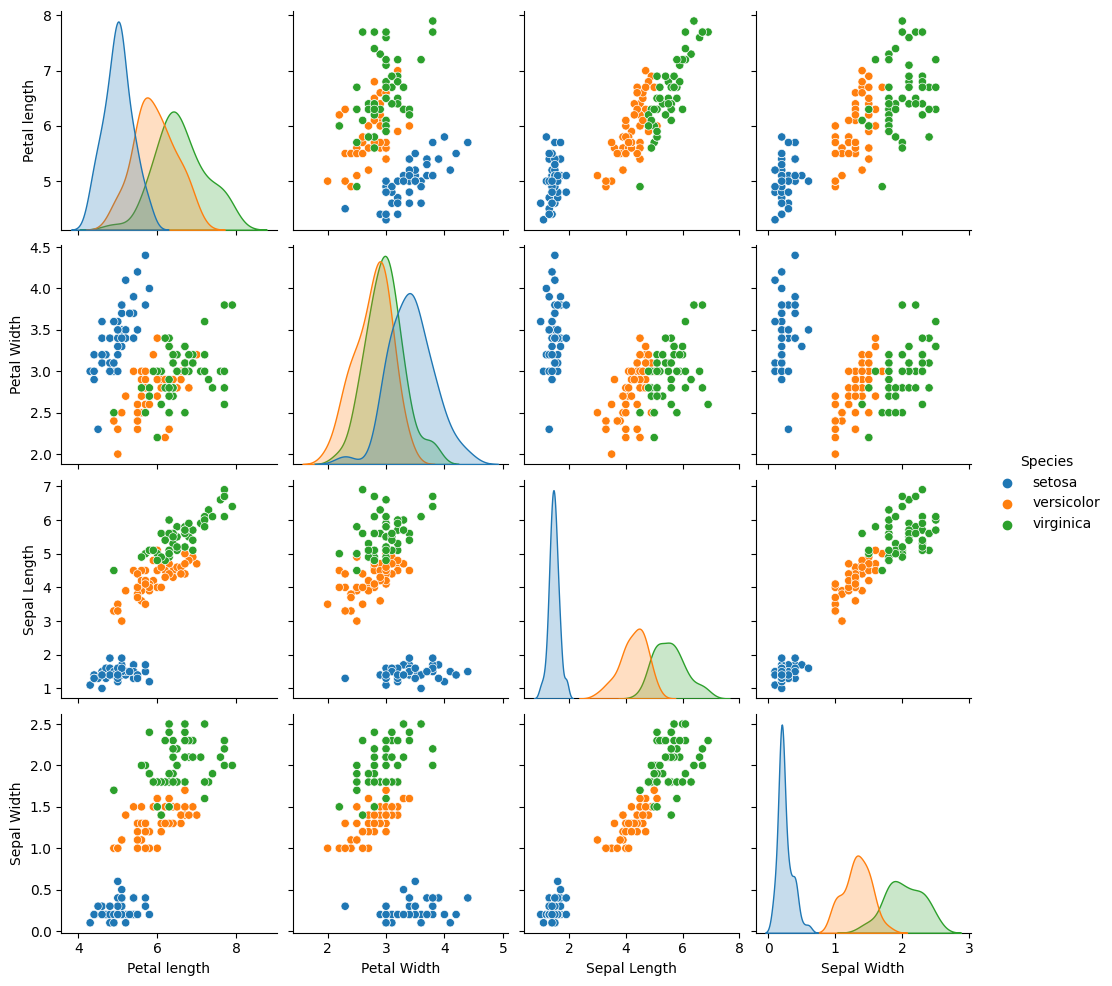

In [16]:
plt.figure(figsize=(25,25))
sns.pairplot(df, hue='Species')
plt.show()

[]

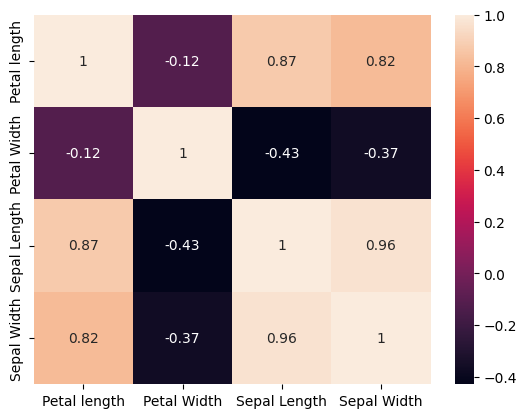

In [18]:
#Heatmap Correlation:
sns.heatmap(df.corr(), annot = True)
plt.plot()

## Model Building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

ModuleNotFoundError: No module named 'pydot'

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [17]:
classifier = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2)

In [18]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
value = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

In [21]:
value.head()

,Actual,Predicted
0,1,1
1,2,2
2,1,1
3,0,0
4,1,1


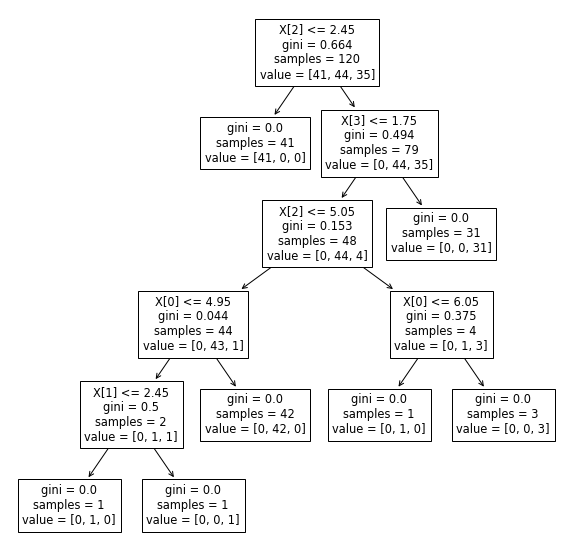

In [23]:
# visualizing the tree which is formed on training set
plt.figure(figsize = (10,10))
tree.plot_tree(classifier)
plt.rcParams['figure.figsize']=(25,10)    